# Chained ReLU functions

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def ReLU(x, debug=False):
    '''@returns y'''
    if debug:
        print("ReLU x input:", x)
    if x > 0:
        if debug:
            print("Returning x:", x)
        return x
    else:
        if debug:
            print("Returning 0")
        return 0

In [11]:
def run_ReLU_neuron(weight=1, bias=0, x_inputs=[], no_x_lower_bound=-5, no_x_upper_bound=5, debug=False, plot=False):
    '''Defaults to lower_bound->upper_bound if no x_inputs provided'''
    relu_inputs = []
    y_results = []

    if len(x_inputs) > 0:
        for i in range(len(x_inputs)):
            relu_input = (np.dot(x_inputs[i], weight)) + bias
            relu_inputs.append(relu_input)

            y_results.append(ReLU(relu_input))
    else:
        for i in range(no_x_lower_bound, no_x_upper_bound):
            x_inputs.append(i)
            relu_input = (np.dot(i, weight)) + bias
            relu_inputs.append(relu_input)

            y_results.append(ReLU(relu_input))

    if debug:
        print("*****")
        print("Weight:", weight, "Bias:", bias)
        print("X Inputs:", x_inputs)
        print("RELU Inputs:", relu_inputs)
        print("Y Results:", y_results)
    if plot:
        plt.plot(x_inputs, y_results)
        plt.xlabel("x")
        plt.ylabel("y (ReLU output)")
        plt.ylim(ymin=0)
        plt.show()

    return y_results

In [12]:
X = []
for i in range(-5, 5):
    X.append(i)

X

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

*****
Weight: 1 Bias: 0
X Inputs: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
RELU Inputs: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
Y Results: [0, 0, 0, 0, 0, 0, 1, 2, 3, 4]


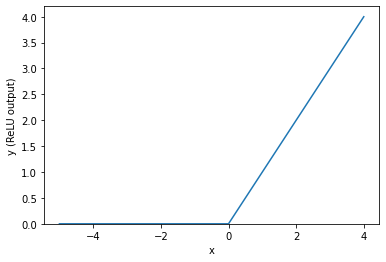

[0, 0, 0, 0, 0, 0, 1, 2, 3, 4]

In [13]:
run_ReLU_neuron(weight=1, bias=0, x_inputs=X, debug=True, plot=True)

*****
Weight: -1 Bias: 0.5
X Inputs: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
RELU Inputs: [5.5, 4.5, 3.5, 2.5, 1.5, 0.5, -0.5, -1.5, -2.5, -3.5]
Y Results: [5.5, 4.5, 3.5, 2.5, 1.5, 0.5, 0, 0, 0, 0]


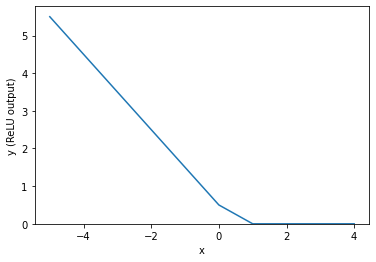

In [14]:
# y1 = ReLU((w1 * x1) + b1)
y1 = run_ReLU_neuron(weight=-1, bias=0.5, x_inputs=X, debug=True, plot=True)

*****
Weight: 1 Bias: 1
X Inputs: [5.5, 4.5, 3.5, 2.5, 1.5, 0.5, 0, 0, 0, 0]
RELU Inputs: [6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 1, 1, 1, 1]
Y Results: [6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 1, 1, 1, 1]


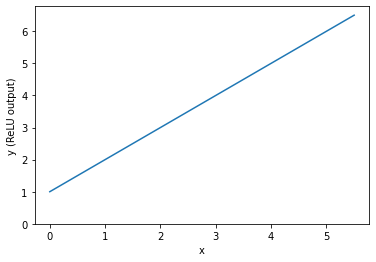

In [15]:
# y2 = ReLU((w2 * y1) + b2)
y2 = run_ReLU_neuron(weight=1, bias=1, x_inputs=y1, debug=True, plot=True)

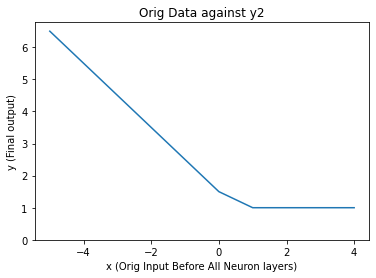

Orig X: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
Y2: [6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 1, 1, 1, 1]


In [17]:
plt.plot(X, y2)
plt.title("Orig Data against y2")
plt.xlabel("x (Orig Input Before All Neuron layers)")
plt.ylabel("y (Final output)")
plt.ylim(ymin=0)
plt.show()

print("Orig X:", X)
print("Y2:", y2)

How does the second ReLU bias shift vertically if the first bias shifts horizontally?

- First neuron output removes anything below 0. Lowest vals will be 0.
- Second neuron will have values AT LEAST 0 on both x and y. Since taking output from neuron 1.
- Therefore any positive bias shift AFTER the clipping from layer 1 will take the values to be OVER zero